In [9]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')

In [12]:
df.insert(0, 'book_',[book for book,_ in df[df.columns[0]].str.split('_',n=1)] )

Index(['BookOfEccleasiasticus', 'BookOfEcclesiastes', 'BookOfProverb',
       'BookOfWisdom', 'Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra'],
      dtype='object', name='book_')

In [20]:
books_df = df.groupby(['book_']).sum()
books = books_df.index

# Top 20

In [57]:
 def top_twenty_words (cleaned_df):
    data = {}
    easier_table = cleaned_df.transpose()
    book_names = easier_table.columns
    
    for book in book_names:
        data[book] = easier_table[book].sort_values(ascending = False).head(20)
        
    return data 

In [60]:
books_top20=top_twenty_words(books_df)

In [79]:
books_top20['Buddhism'],books_top20['TaoTeChing']

(right            128
 feeling           85
 one               75
 stress            74
 body              73
 monk              72
 mind              71
 remains           63
 cessation         62
 called            62
 mental            58
 discerns          58
 focused           56
 way               55
 consciousness     47
 noble             46
 property          43
 qualities         42
 concentration     40
 form              39
 Name: Buddhism, dtype: int64,
 tao          84
 things       56
 one          51
 men          45
 great        42
 therefore    40
 heaven       38
 would        36
 thus         33
 people       32
 without      32
 know         31
 sage         31
 state        28
 yet          28
 way          24
 like         24
 s            23
 may          23
 place        21
 Name: TaoTeChing, dtype: int64)

In [38]:
top_20_across_books = total_wd_count.sum(axis = 0).sort_values(ascending = False).head(20)


In [61]:
top_20_across_books.index

Index(['shall', 'man', 'thy', 'one', 'things', 'thou', 'god', 'life', 'hath',
       'spiritual', 'lord', 'mind', 'thee', 'heart', 'soul', 'wisdom', 'men',
       'upon', 'good', 'way'],
      dtype='object')

<BarContainer object of 20 artists>

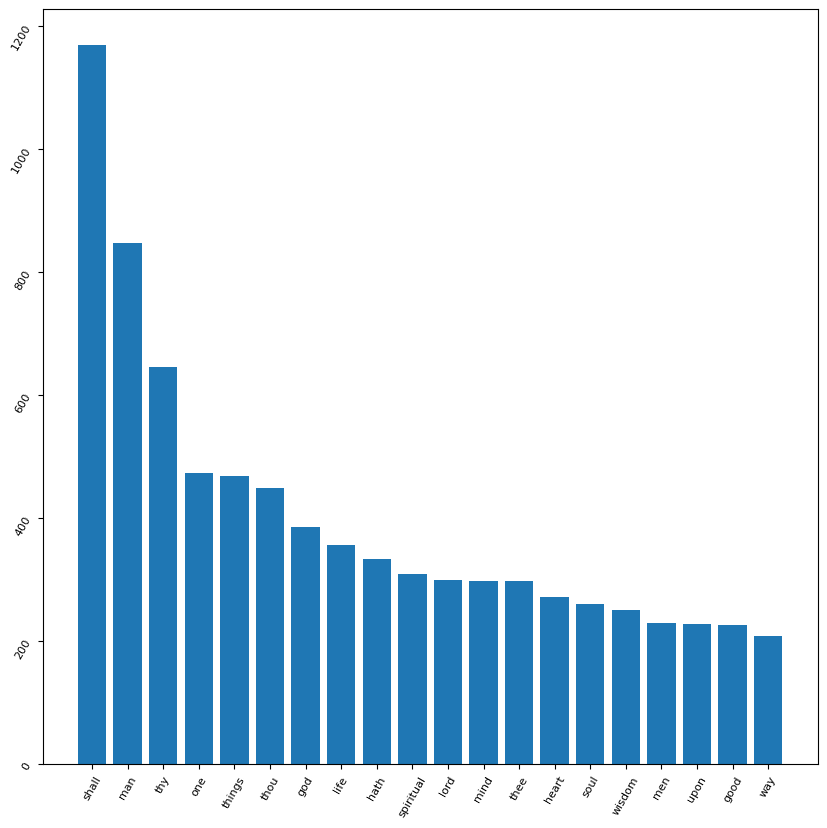

In [97]:
plt.figure(figsize=(10,10),dpi=100)
plt.xticks(size=8,rotation = 60)
plt.yticks(size=8, rotation = 60)
plt.bar(top_20_across_books.index,top_20_across_books.values)

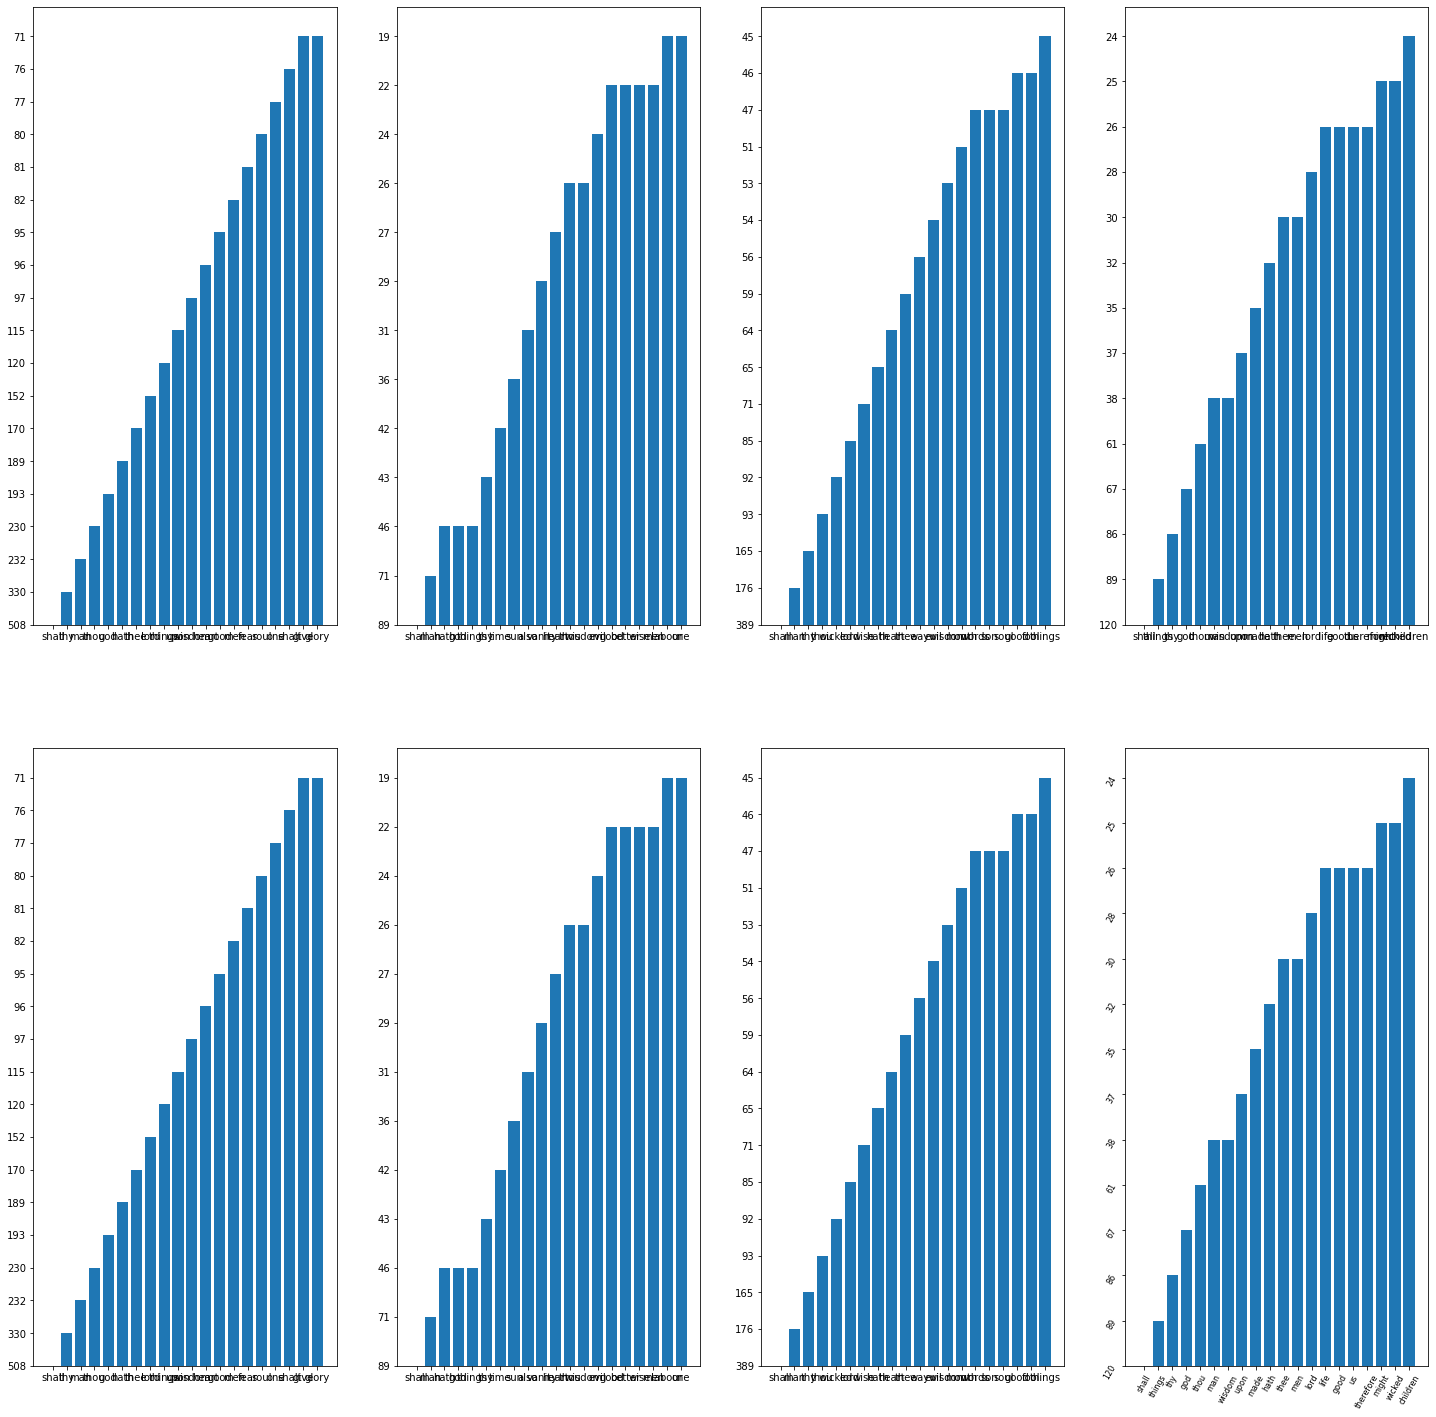

In [117]:
# plt.figure(figsize=(10,10),dpi=100)


fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(25,25))

for i in range(4):
    x = books_top20[books[i]]
    x = np.array(list(x.items())).T
#     print(x)
    plt.xticks(size=8,rotation = 60)
    plt.yticks(size=8, rotation = 60)
    axs[0,i].bar(x[0],x[1])
for i in range(4):
    x = books_top20[books[i]]
    x = np.array(list(x.items())).T
#     print(x)
    axs[1,i].bar(x[0],x[1])

# A Closer Look at Buddhism and Taoism

# UMAP Ananlysis

In [80]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(books_df[books_df.columns[1:]])

/Users/ishaangupta/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


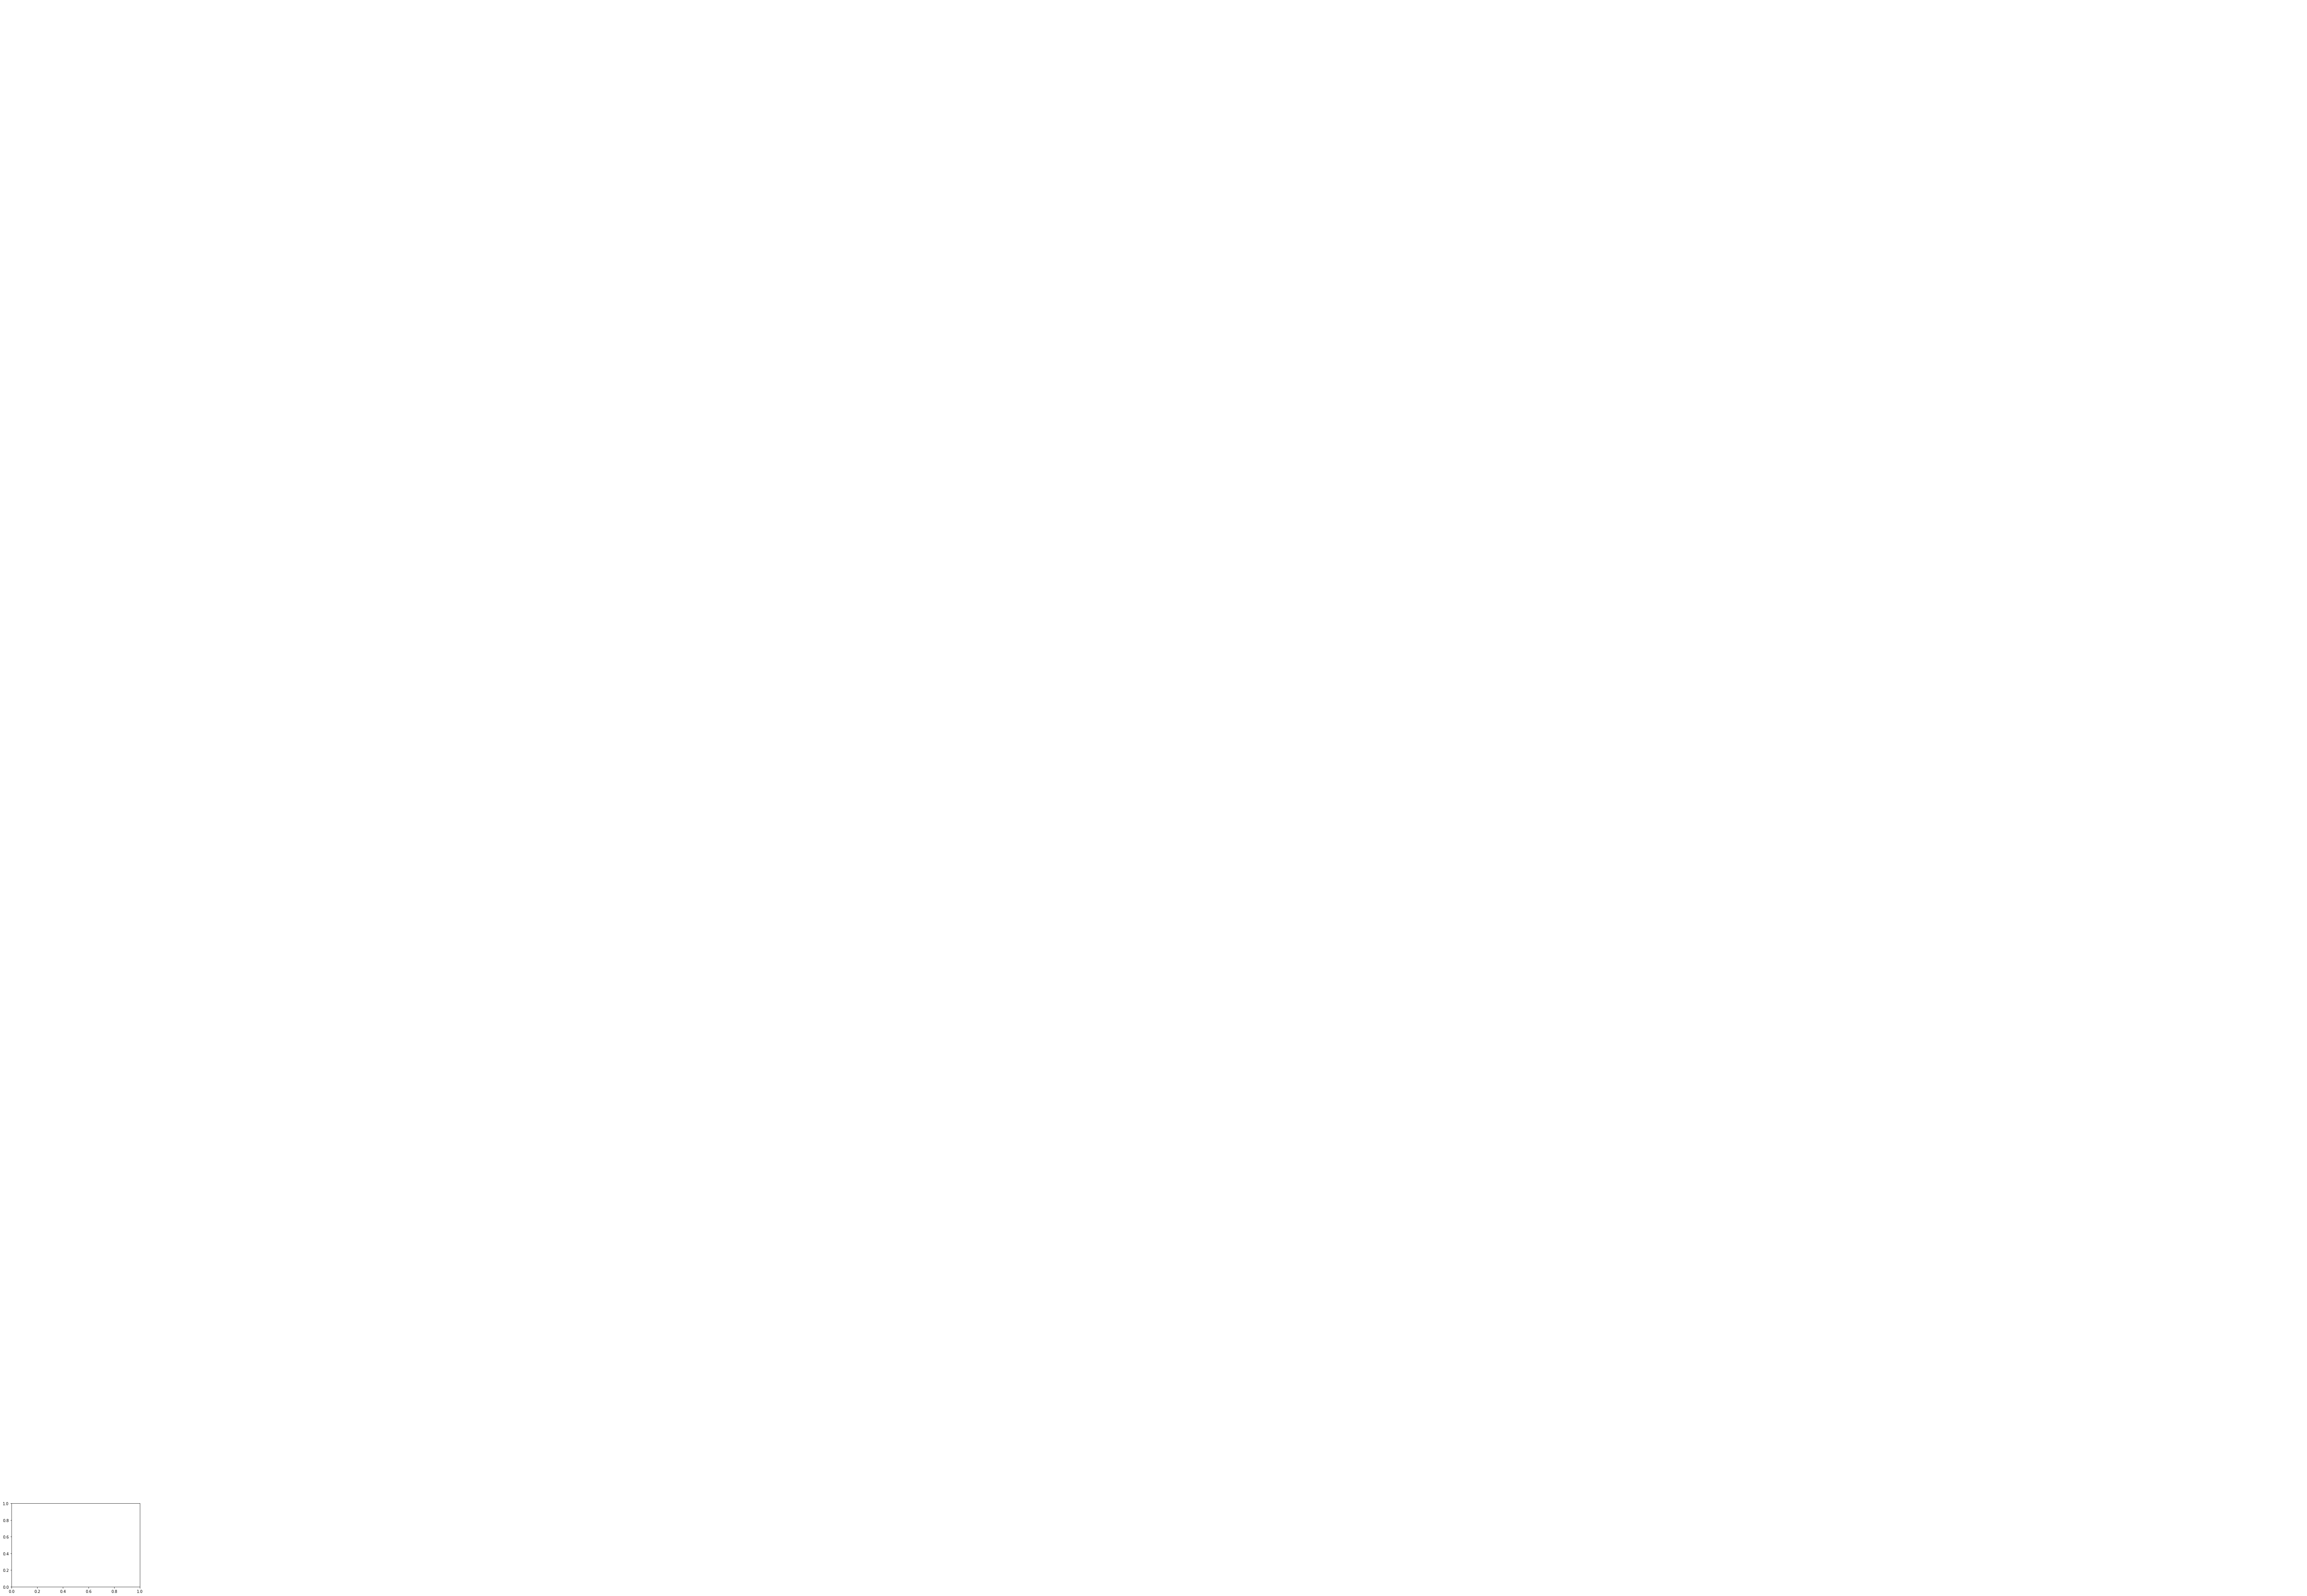

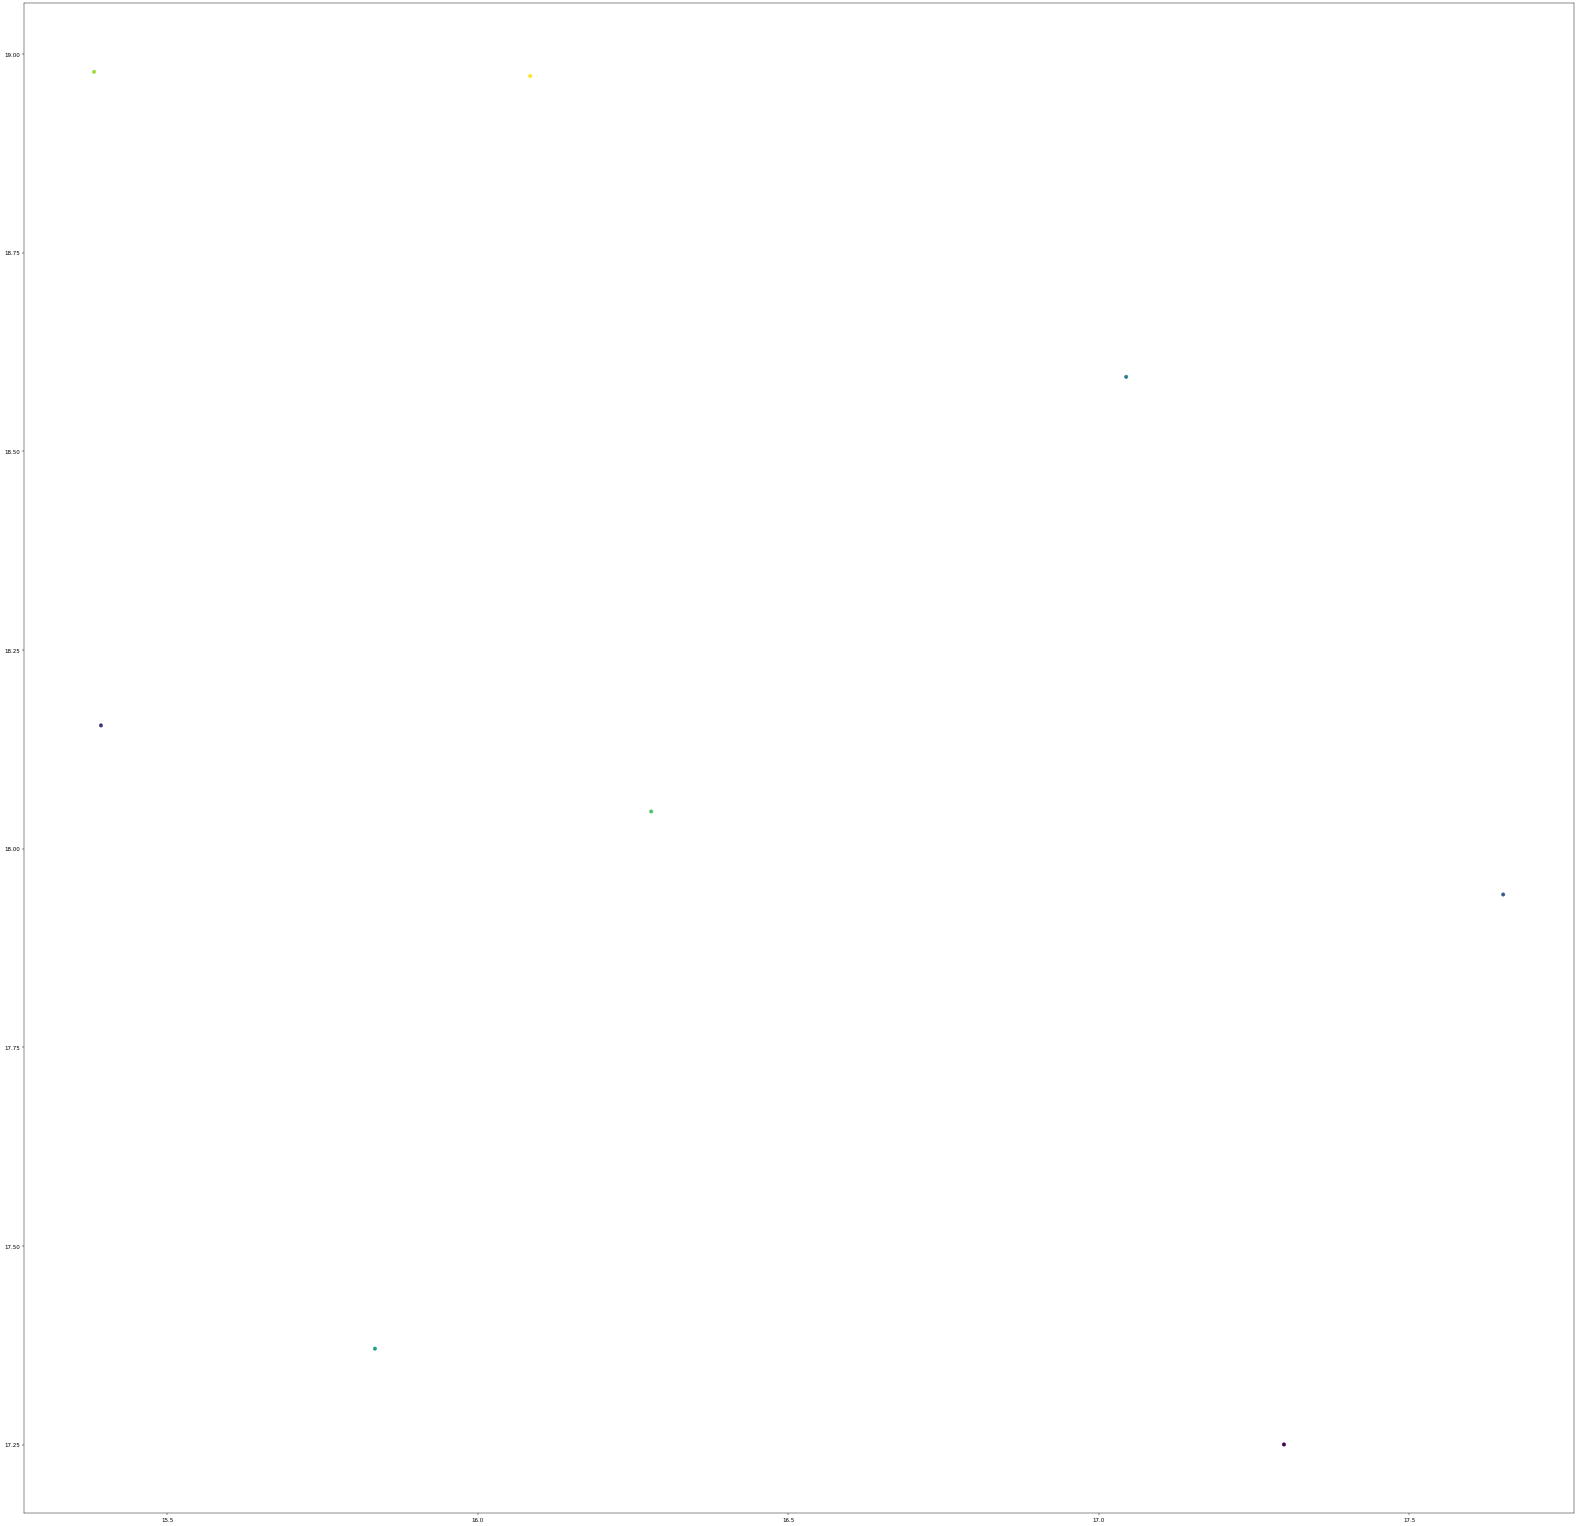

In [89]:
fig,ax = plt.subplots()
plt.figure(figsize=(50,50),dpi=40)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=np.arange(8))
for i in np.arange(8):
    ax.annotate(books[i],(embedding[i, 0],embedding[i, 1]))


In [5]:
df_Buddhism = df[df['Unnamed: 0'].str.contains('Buddhism')]
df_Taoism = df[df['Unnamed: 0'].str.contains('Taoism')]